In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.shape

(1000, 17)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Checking Total Sales by Product Line

In [8]:
product_line_group = df.groupby(by='Product line')

In [9]:
product_line_group['Total'].sum().round().astype(np.int64)

Product line
Electronic accessories    54338
Fashion accessories       54306
Food and beverages        56145
Health and beauty         49194
Home and lifestyle        53862
Sports and travel         55123
Name: Total, dtype: int64

In [10]:
df.groupby(by=['City', 'Branch'])['Invoice ID'].count()

City       Branch
Mandalay   B         332
Naypyitaw  C         328
Yangon     A         340
Name: Invoice ID, dtype: int64

In [11]:
result = df.groupby(by=['City', 'Branch'])['Invoice ID'].count().reset_index(name='Count')
sorted_result = result.sort_values(by='Count', ascending=False)

In [12]:
sorted_result

,City,Branch,Count
2,Yangon,A,340
0,Mandalay,B,332
1,Naypyitaw,C,328


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [17]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

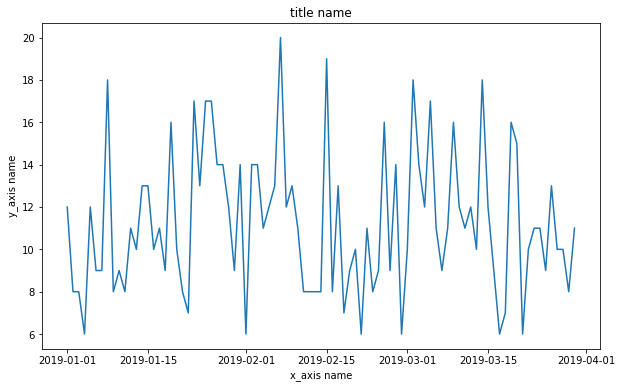

In [23]:
plt.figure(figsize=(10, 6))

date_total = df.groupby(by='Date')['Total'].count().reset_index(name = 'Total Sales')
date_total
plt.plot(date_total['Date'], date_total['Total Sales'])
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

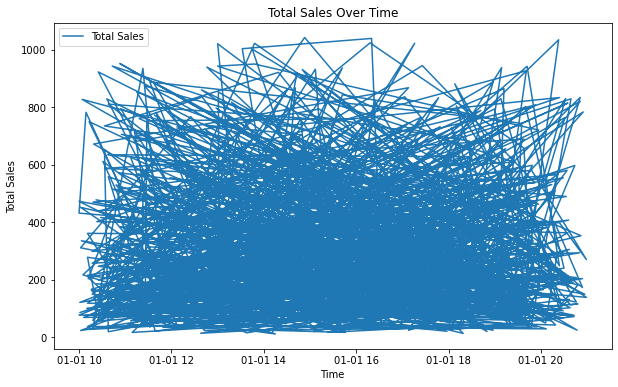

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Total'], label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()  # Add a legend if there are multiple lines in the plot
plt.show()

In [35]:
import seaborn as sns

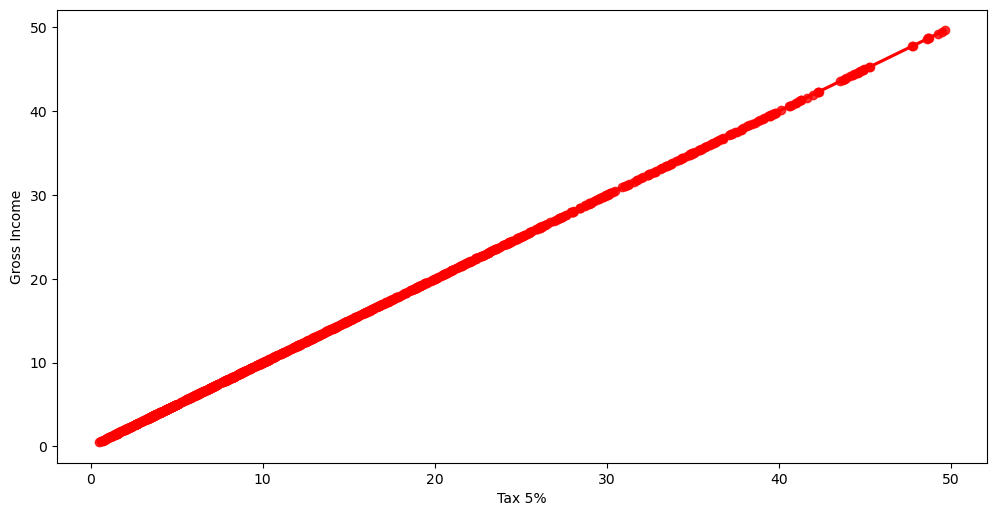

In [36]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

In [37]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

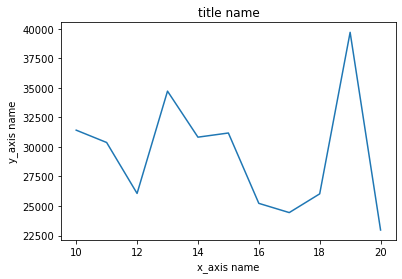

In [38]:
hour_total = df.groupby(by='Hour')['Total'].sum().round().reset_index(name = 'Total Sales')
hour_total
plt.plot(hour_total['Hour'], hour_total['Total Sales'])
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

In [39]:
hour_total

,Hour,Total Sales
0,10,31421.0
1,11,30377.0
2,12,26066.0
3,13,34723.0
4,14,30828.0
5,15,31180.0
6,16,25226.0
7,17,24445.0
8,18,26030.0
9,19,39700.0


In [51]:
product_line_group = df.groupby('Product line')['Total'].mean().round().reset_index(name='Total Sales')

In [52]:
product_line_group

,Product line,Total Sales
0,Electronic accessories,320.0
1,Fashion accessories,305.0
2,Food and beverages,323.0
3,Health and beauty,324.0
4,Home and lifestyle,337.0
5,Sports and travel,332.0


<AxesSubplot:xlabel='Product line', ylabel='Total Sales'>

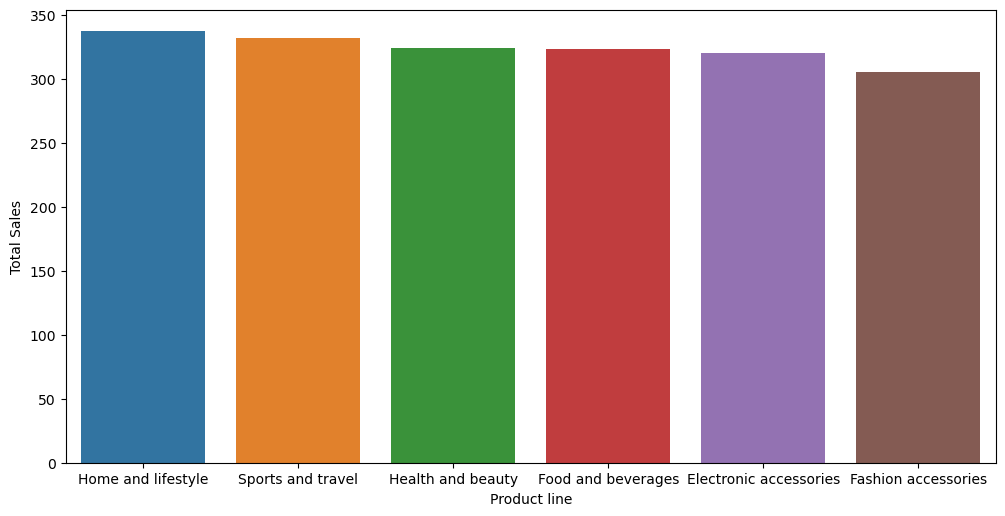

In [53]:
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(x = 'Product line'
                , y = 'Total Sales'
                , data = product_line_group
                , order =  product_line_group.sort_values('Total Sales', ascending=False)['Product line'])